In [1]:
#Problem Statement
#Prepare a model for glass classification using KNN

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\KNN\glass.csv")

In [4]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
glass.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [29]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [30]:
glass.drop_duplicates(inplace=True)

In [31]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
glass['Type'] = glass['Type'].replace({1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',5:'containers',6:'tableware',7:'headlamps'})


In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [10]:
array = glass.values
X = array[:, 0:9]
Y = array[:, -1]

# Data Visualization

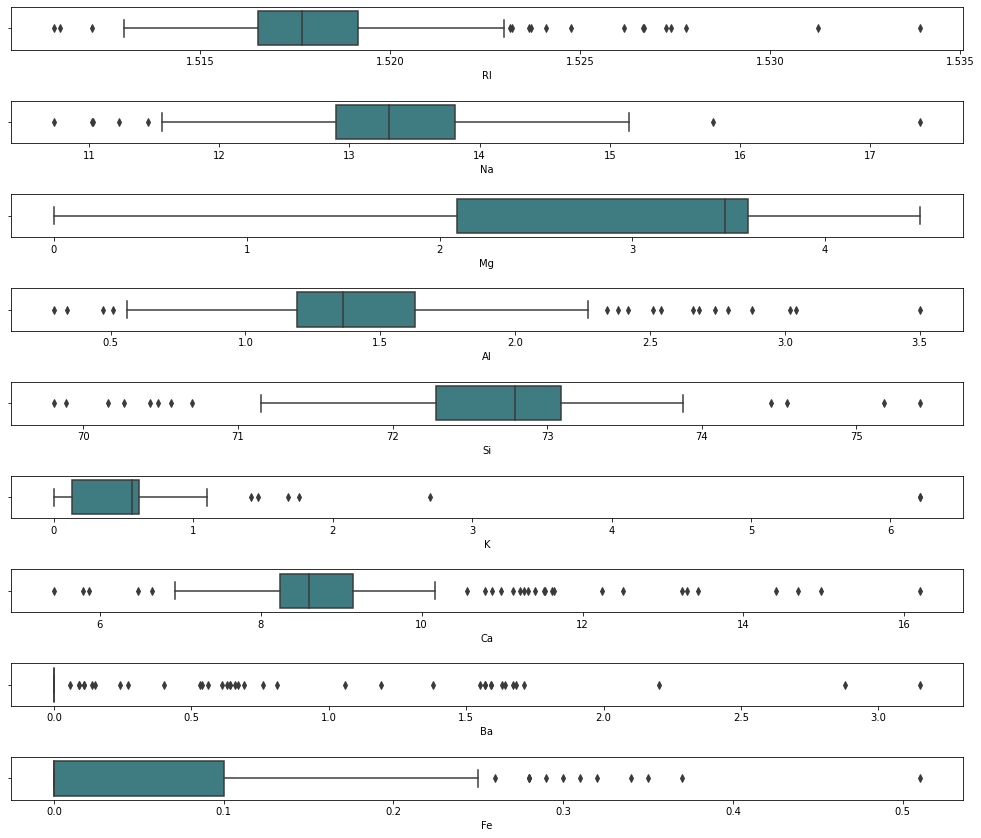

In [35]:
ot=glass.copy() 
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

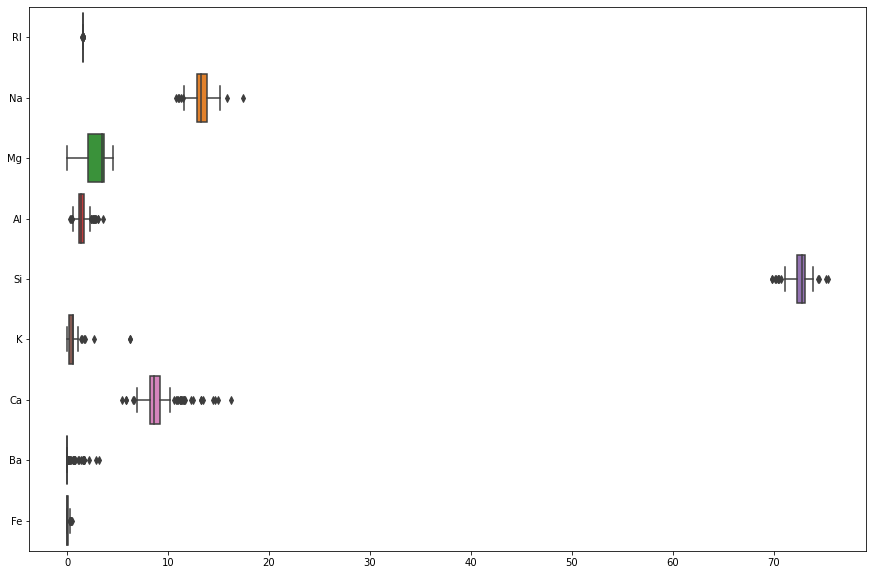

In [38]:
#outlier
plt.figure(figsize=(15,10))
sns.boxplot(data=glass, orient="h");

<Figure size 576x576 with 0 Axes>

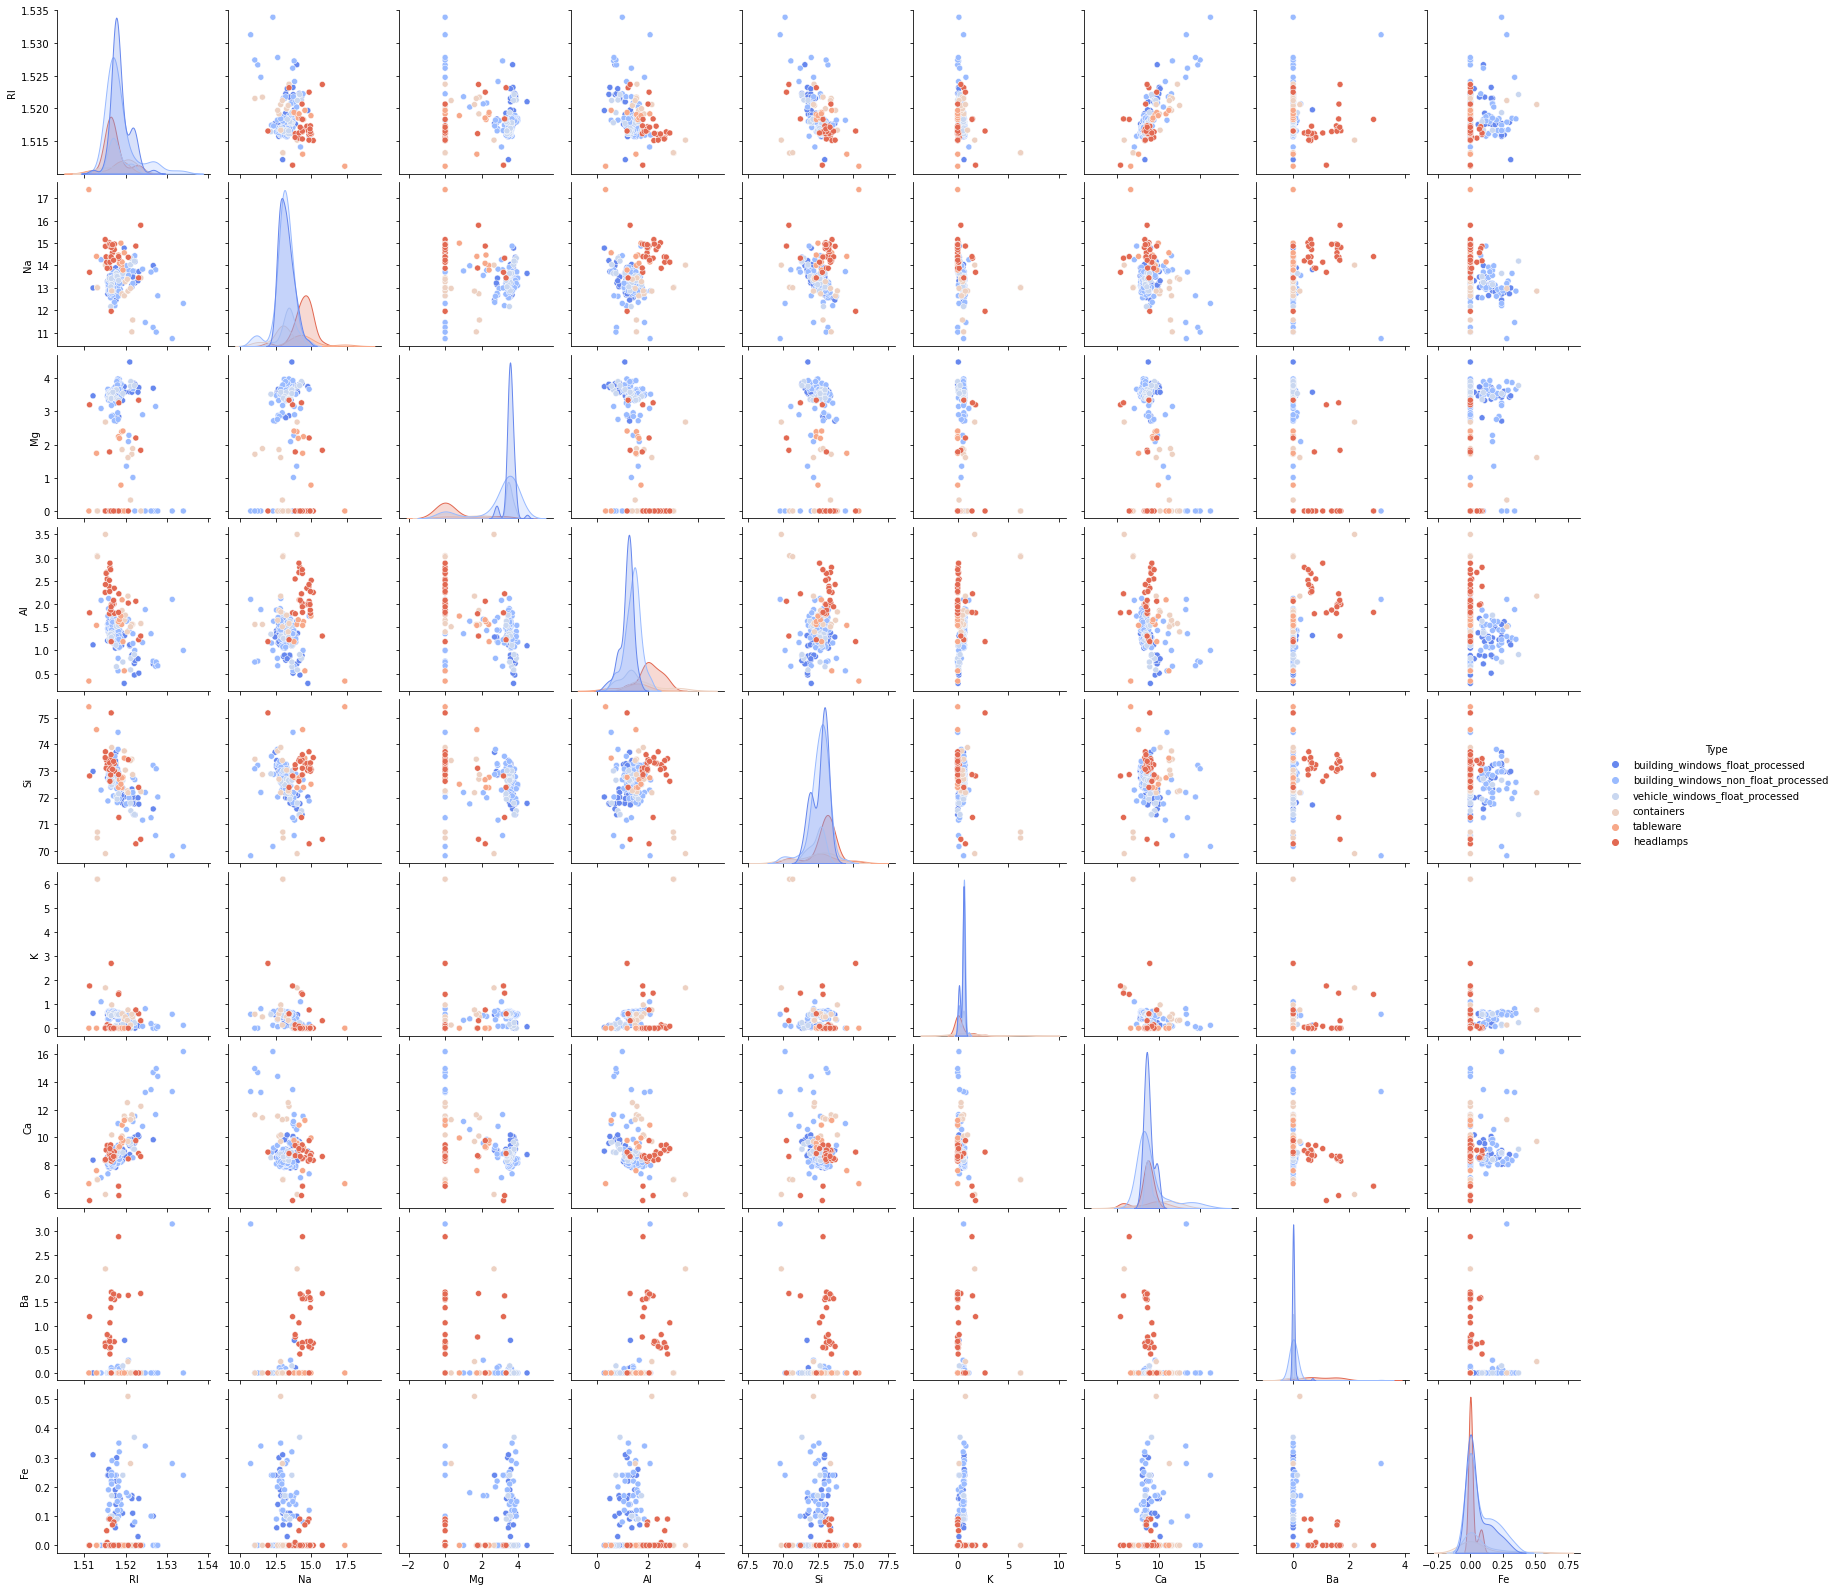

In [39]:
plt.figure(figsize=(8,8))
sns.pairplot(glass,hue ='Type', palette='coolwarm')
plt.show()

<AxesSubplot:>

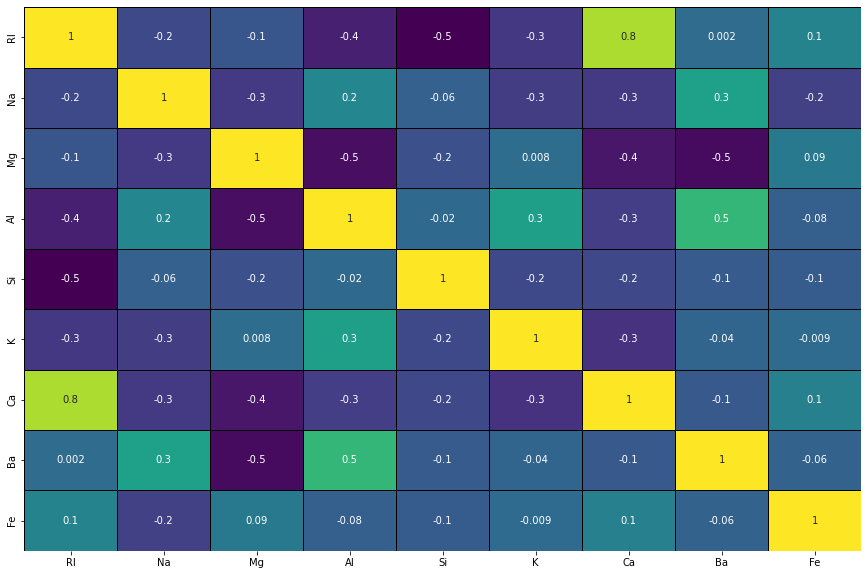

In [40]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Histogram of Classes')

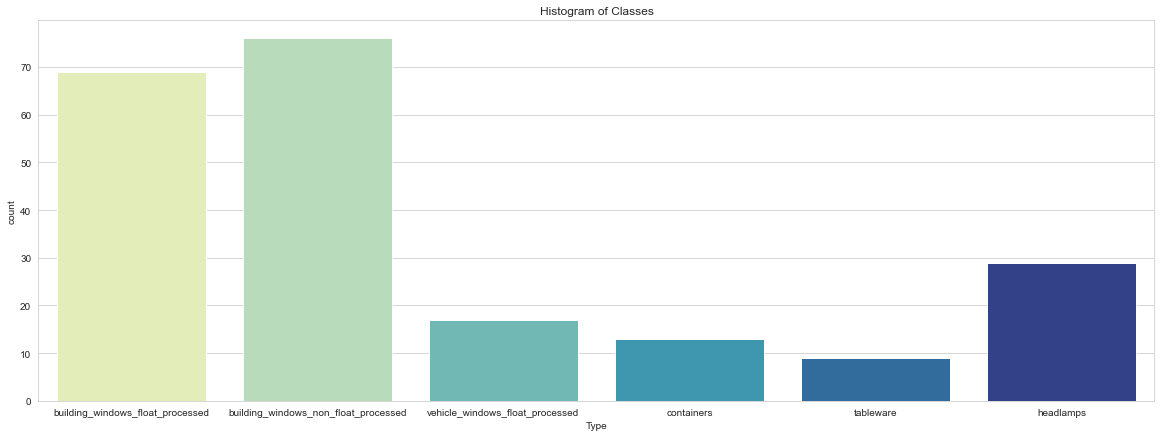

In [44]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (20,7)
sns.countplot(glass['Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

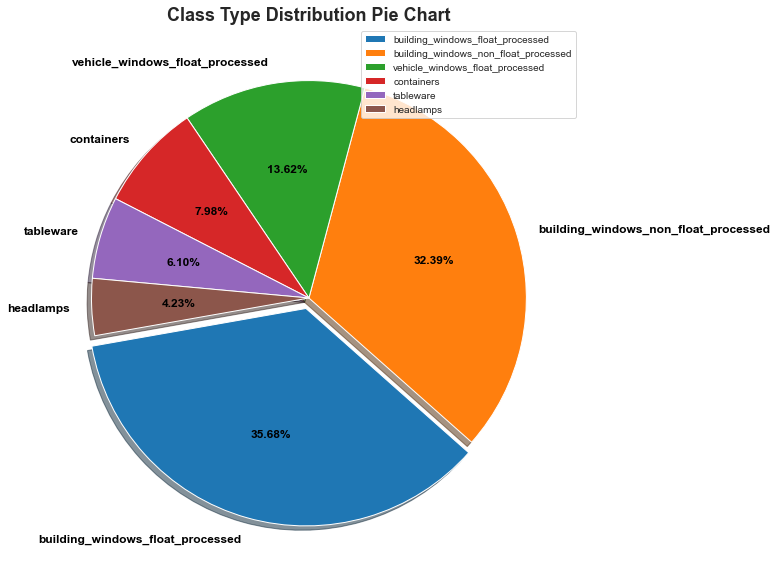

In [46]:
plt.figure(figsize = (12,10))
plt.pie(glass['Type'].value_counts(),
       labels=glass.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [11]:
num_folds = 10
kfold = KFold(n_splits=10)

In [12]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)

In [13]:
print(results.mean())

0.42878787878787883


### Grid Search for Algorithm Tuning

In [14]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
array = glass.values
X = array[:, 0:9]
Y = array[:, -1]

In [16]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [17]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [19]:
# using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state = 23)

In [20]:
# creating or building a model
model = KNeighborsClassifier(n_neighbors=1,metric = 'euclidean')
modelkn = model.fit(x_train,y_train)# fitting on a train data 

In [21]:
preds = modelkn.predict(x_test) # predicting on test data
preds

array(['headlamps', 'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed',
       'building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'containers',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed', 'headlamps',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'building_windows_float_processed', 'containers',
       'building_windows_float_processed',
       'building_windows_non_float_processed',
       'bu

In [22]:
np.mean(preds==y_test)*100

76.74418604651163

In [23]:
# actual vs predicted
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
0,headlamps,headlamps
1,building_windows_float_processed,building_windows_float_processed
2,building_windows_float_processed,building_windows_float_processed
3,tableware,building_windows_non_float_processed
4,building_windows_float_processed,building_windows_float_processed
5,building_windows_non_float_processed,building_windows_non_float_processed
6,building_windows_float_processed,building_windows_float_processed
7,headlamps,headlamps
8,building_windows_float_processed,building_windows_float_processed
9,building_windows_float_processed,building_windows_float_processed


In [24]:
# model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
confusion_matrix = confusion_matrix(y_test,preds)
print(confusion_matrix)

[[13  0  0  0  0  0]
 [ 2 14  2  0  1  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  4  1  0]
 [ 0  1  0  0  1  0]
 [ 3  0  0  0  0  0]]


In [25]:
print(classification_report(y_test,preds))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.72      1.00      0.84        13
building_windows_non_float_processed       0.93      0.74      0.82        19
                          containers       0.33      1.00      0.50         1
                           headlamps       1.00      0.80      0.89         5
                           tableware       0.33      0.50      0.40         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.77        43
                           macro avg       0.55      0.67      0.58        43
                        weighted avg       0.77      0.77      0.75        43



### Visualizing the CV results

In [26]:
import pandas as pd


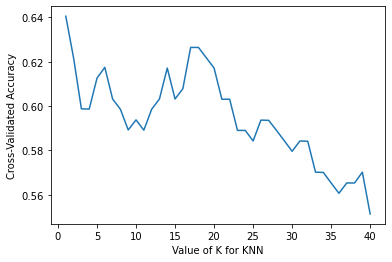

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [28]:
pd.DataFrame(k_scores).sort_values(0)

,0
39,0.551384
35,0.560687
36,0.565338
34,0.565338
37,0.565338
33,0.570100
38,0.570210
32,0.570210
29,0.579623
31,0.584164
